# 선형결합(linear combinations)과 생성(span),기저(basis)

**이 글에서는 n차원공간상에서의 선형결합이 어떠한 형태를 형성하는지에 대한 관점을 제공하려고 한다.**

먼저 단위 벡터에 대해 알아야한다.  
**단위벡터란?**  
- 차원에서 각각의 축에 대응되는 크기가 1인 벡터를 의미한다.
- 흔히 x축에 대응되는 벡터를 $\hat{i}$, y축에 대응되는 벡터를 $\hat{j}$라고 정의한다.


각 좌표를 스칼라로 생각해보고 직관을 발휘해보자.  
스칼라를 달리하여 단위벡터를 곱하고 합하는 과정을 지속한다고 했을 때, 만들 수 있는 2차원 벡터에는 어떤 것들이 있을까?

**정답은 모든 2차원 벡터이다.**  
이때 $\hat{i}$,$\hat{j}$은 기저벡터 또한 성립된다.  
기저벡터: n차원 공간에서 임의의 벡터를 표현할 수 있는 기준이 되는 벡터
<br/>
**그럼 이제 위의 내용이 옳은지 코드로 확인해보자.** 
(특정 상수의 상수배는 모든 수를 표현할 수 있음을 인지하고 있어야한다.)

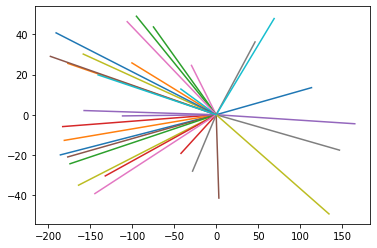

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

a=4
b=1

a_s=0
b_s=0

#반복횟수를 증가시키면서 확인해보자
for i in range(30):
    scale1 = np.random.uniform(-50,50)
    scale2 = np.random.uniform(-50,50)
    
    a_s=a*scale1
    b_s=b*scale2
         
    plt.plot([0,a_s],[0,b_s])
    
    
plt.show()

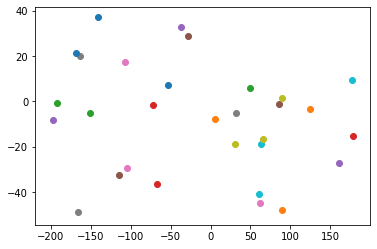

In [10]:
a=4
b=1

a_s=0
b_s=0

for i in range(30):
    scale1 = np.random.uniform(-50,50)
    scale2 = np.random.uniform(-50,50)
    
    a_s=a*scale1
    b_s=b*scale2
         
    plt.scatter(a_s,b_s)
    
plt.show()

우리는 단위벡터와 벡터의 곱의 합으로 2차원평면을 구현할 수 있다는 것을 시각적으로 확인했다.

**단위벡터가 아닌 다른 벡터 2개를 사용해도 모든 2차원 평면을 구현할 수 있을까?**  
정답은 그럴 수도 있고 아닐 수도 있다.  
- 이를 설명하기 위해 방향이 다른 두 벡터와 같은 벡터를 사용하여 코드를 재작성해보겠다. 

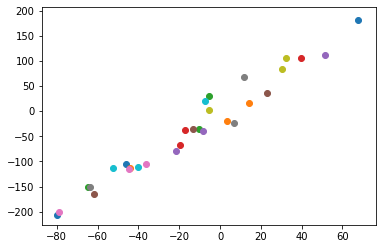

In [24]:
v=np.array([1,2])
w=np.array([1,3])

#scale도 조정해가면서 확인해보자
for i in range(30):
    scale1=np.random.uniform(-50,50)
    scale2=np.random.uniform(-50,50)
    
    new_vector=scale1*v+scale2*w
    
    plt.scatter(new_vector[0],new_vector[1])
    
plt.show()

방향이 비슷하지만 다른 두 개의 벡터를 사용했을 때에 앞,뒤로 움직이는 연관성 자체는 단위벡터와 다르지만 충분히 2차원평면을 표현할 수 있다는 것을 확인했다.

그러면 여기서부터 굳이 구현해보지않아도 방향이 같은 두 벡터를 사용했을 때에는 2차원평면을 표현할 수 없다는 것을 짐작할 수 있지만 이또한 구현해보면 다음과 같다.

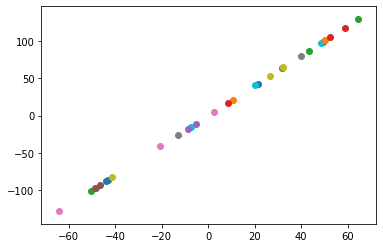

In [25]:
v=np.array([1,2])
w=np.array([1,2])


for i in range(30):
    scale1=np.random.uniform(-50,50)
    scale2=np.random.uniform(-50,50)
    
    new_vector=scale1*v+scale2*w
    
    plt.scatter(new_vector[0],new_vector[1])
    
plt.show()

2차원 평면을 구현하지못하는 것은 zero vector일 때도 마찬가지다. 

이렇게 주어진 두 벡터 쌍의 조합으로 나타날 수 있는 결과 벡터들의 집합을 두 벡터의 **Span**이라 한다.  
- 바로 윗 내용의 결과에서의 span은 선이라고 할 수 있다. 

#### 지금까지 두 벡터를 2차원 공간상에서만 다루어봤으니 3차원공간에서도 위의 내용을 다루어보려고한다.

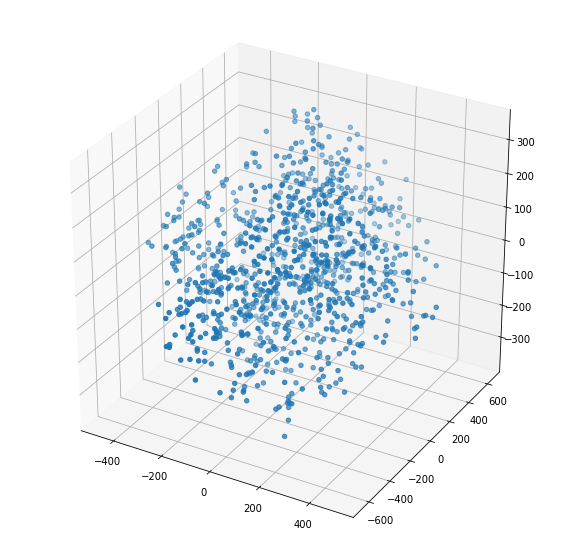

In [66]:
from mpl_toolkits.mplot3d import Axes3D

v=np.array([-3,5,2])
w=np.array([4,7,3])
u=np.array([4,2,-3])

x=[]
y=[]
z=[]

for i in range(1000):
    scale1=np.random.uniform(-50,50)
    scale2=np.random.uniform(-50,50)
    scale3=np.random.uniform(-50,50)
    
    new_vector=scale1*v+scale2*w+scale3*u
    
    x.append(new_vector[0])
    y.append(new_vector[1])
    z.append(new_vector[2])


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y,z,  marker='o', s=20)
plt.show()

3번째 추가한 벡터가 두 벡터의 스팬에 위에 놓여있거나 두 벡터의 스팬이 이미 선인 경우라면 하나의 벡터를 제외해도 되는 상황에 놓여지게된다.
<br/>
이 경우를 **선형종속(linear dependent)**이라하며 각각의 벡터가 차원 증가에 영향을 미치게 될 때, 이를 **선형독립(linear independent)**이라고 표현한다. 